In [ ]:
!pip install rawpy
!pip install fastbook

     |████████████████████████████████| 1.7MB 12.0MB/s 
     |████████████████████████████████| 727kB 12.7MB/s 
     |████████████████████████████████| 194kB 40.8MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 1.2MB 32.7MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
!wget https://raw.githubusercontent.com/cchen156/Learning-to-See-in-the-Dark/master/dataset/Sony_train_list.txt

--2021-07-12 13:37:14--  https://raw.githubusercontent.com/cchen156/Learning-to-See-in-the-Dark/master/dataset/Sony_train_list.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133675 (131K) [text/plain]
Saving to: ‘Sony_train_list.txt’

Sony_train_list.txt 100%[===================>] 130.54K  --.-KB/s    in 0.009s  

2021-07-12 13:37:15 (14.2 MB/s) - ‘Sony_train_list.txt’ saved [133675/133675]



In [ ]:
import rawpy 
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import PIL
from pathlib import Path
import matplotlib.pyplot as plt 
import fastbook 
from fastai import *
from fastai.vision.all import *

In [ ]:
def preprocess_dataframe(txt_path , add_path = 'drive/MyDrive/dark_data'):
  '''
  Pass a txt_path and this function does the following things: 
  1. Load in the txt file as a dataframe and add the right column names
  2. Remove the dots trailing with each element in a row
  5. Add a full path 
  '''
  # Column names
  col_names = ['short_exp' , 'long_exp' , 'ISO' , 'aperture']

  # Loading the txt and renaming the columns 
  df = pd.read_csv(txt_path , sep = ' ' , names = col_names)

  # Remove the trailing dots and adding full directory path 
  for col in df.columns[:2]:
    df[col] = df[col].apply(lambda x: x[1:])
    df[col] = add_path + df[col].astype(str)

  return df 

In [ ]:
df = preprocess_dataframe(txt_path = '/content/Sony_train_list.txt',add_path='/content/drive/MyDrive')

# preprocessing data (DONT RUN CAUSE YOU ALREADY HAVE DATASET NOW)

In [ ]:
df.head()

short_exp  \
0  /content/drive/MyDrive/Sony/short/00001_00_0.04s.ARW   
1   /content/drive/MyDrive/Sony/short/00001_00_0.1s.ARW   
2  /content/drive/MyDrive/Sony/short/00001_01_0.04s.ARW   
3   /content/drive/MyDrive/Sony/short/00001_01_0.1s.ARW   
4   /content/drive/MyDrive/Sony/short/00001_02_0.1s.ARW   

                                            long_exp     ISO aperture  
0  /content/drive/MyDrive/Sony/long/00001_00_10s.ARW  ISO200       F8  
1  /content/drive/MyDrive/Sony/long/00001_00_10s.ARW  ISO200       F8  
2  /content/drive/MyDrive/Sony/long/00001_00_10s.ARW  ISO200       F8  
3  /content/drive/MyDrive/Sony/long/00001_00_10s.ARW  ISO200       F8  
4  /content/drive/MyDrive/Sony/long/00001_00_10s.ARW  ISO200       F8

## converting and saving data (no need if you have dataset in png format)

In [ ]:
def convert_and_save(df,save_folder = '/content/drive/MyDrive/png_ds',mode = 'short_exp'):
  """
  df : dataframe 
  save_folder : folder which you want to save dataset to 
  mode : short_exp for short and long_exp for long dataset 

  """
  files = df[mode] # reading the files from df 
  if mode == 'short_exp':
    name = 'short'
  else:
    name = 'long'
  for f in files:
    fname = Path(f) # getting
    filename = Path(f[:-4]).name
    raw = rawpy.imread(f)
    rgb = raw.postprocess()
    PIL.Image.fromarray(rgb).save(f'{save_folder}/{name}/{filename}.jpg', quality=90, optimize=True)

In [ ]:
convert_and_save(df,mode = 'short_exp')

In [ ]:
convert_and_save(df,mode = 'long_exp')

# verify dataset

In [ ]:
def verify_files(df,jpg_form_path='/content/drive/MyDrive/png_ds',mode='short_exp'):
  files = df[mode]
  fuk = 0 
  miss= []
  ok=0
  for f in files:
    fo = Path(f)
    sh_o_lo = fo.parts[-2:-1][0]
    c_path = Path(f'{jpg_form_path}/{sh_o_lo}/{fo.name[:-3]}jpg')
    if not c_path.is_file():
      miss.append(c_path)
      fuk+=1
    else :
      ok+=1
  print(f'missing : {fuk}, okay : {ok}')
  return miss,fuk,ok
    

In [ ]:
short_missed, no_miss, okie_no = verify_files(df,jpg_form_path='/content/drive/MyDrive/png_format')

missing : 0, okay : 1865


In [ ]:
long_missed, long_miss_no,loneOkay = verify_files(df,jpg_form_path = '/content/drive/MyDrive/png_format',mode = 'long_exp')

missing : 0, okay : 1865


# In case of missed files run the below cell with missed file to manage them 

In [ ]:
# short_missed

[]

In [ ]:
# def raw_to_png(filepath,basepath = '/content/drive/MyDrive/Sony'):
#     filename =filepath.name[:-4] + '.ARW'
#     type_of_data = filepath.parts[-2] # short or long
#     total_path = f'{basepath}/{type_of_data}/{filename}' # total file path
#     if Path(total_path).is_file():
#       raw = rawpy.imread(total_path)
#       rgb = raw.postprocess()
#       PIL.Image.fromarray(rgb).save(f'{filepath}', quality=90, optimize=True)
#     else: 
#       print(total_path)

# for paths in missed_paths:
#   raw_to_png(paths)

NameError: ignored

# Making our dataframe ready for having all paths `.jpg` format  

In [ ]:
def apply_transf(jpg_path,filename):
  p = Path(filename)
  part = p.parts
  tot_pat = f'{jpg_path}/{part[-2]}/{part[-1][:-4]}.jpg'
  return tot_pat

def rearrange_df(df,jpg_path = '/content/drive/MyDrive/png_format',mode = ['short_exp','long_exp']):
  """
  rearranges the dataframe (.ARW to .PNG arrangement)
  """
  cp = df
  for m in mode:
    cp[m] = cp[m].apply(lambda x :apply_transf(jpg_path,x))
  return cp

In [ ]:
mod_df = rearrange_df(df)

# making training and testing datasets 

In [ ]:
# dls = DataLoaders.from_dblock(source = mod_df,dblock =  DataBlock(blocks=(ImageBlock, ImageBlock),
#                            get_x=ColReader('short_exp'),
#                            get_y=ColReader('long_exp')),bs = 10)

In [ ]:
# dls.show_batch()

In [ ]:
def get_dls(bs:int, size:int , path):
  "Generates two `GAN` DataLoaders"
  dblock = DataBlock(blocks=(ImageBlock, ImageBlock),
                     get_x = ColReader('short_exp'),
                   get_y = ColReader('long_exp'), 
                   splitter=RandomSplitter(),
                   item_tfms=RandomResizedCrop(size = size),
                   batch_tfms=[*aug_transforms(max_zoom=2.),
                               Normalize.from_stats(*imagenet_stats)])
  dls = dblock.dataloaders(path , bs=bs)
  dls.c = 3 # For 3 channel image
  return dls

In [ ]:
dls = get_dls(32 , 224, mod_df)

In [ ]:
wd , y_range , loss_gen = 1e-3 , (-3 , 3) , MSELossFlat()
bbone = resnet34 

def create_gen_learner():
  return unet_learner(blur= True , norm_type= NormType.Weight , self_attention= True , y_range = y_range , 
                      dls = dls , arch = bbone , loss_func = loss_gen , n_out = dls.c,lr =4.7863e-06)
  
learn_gen = create_gen_learner()

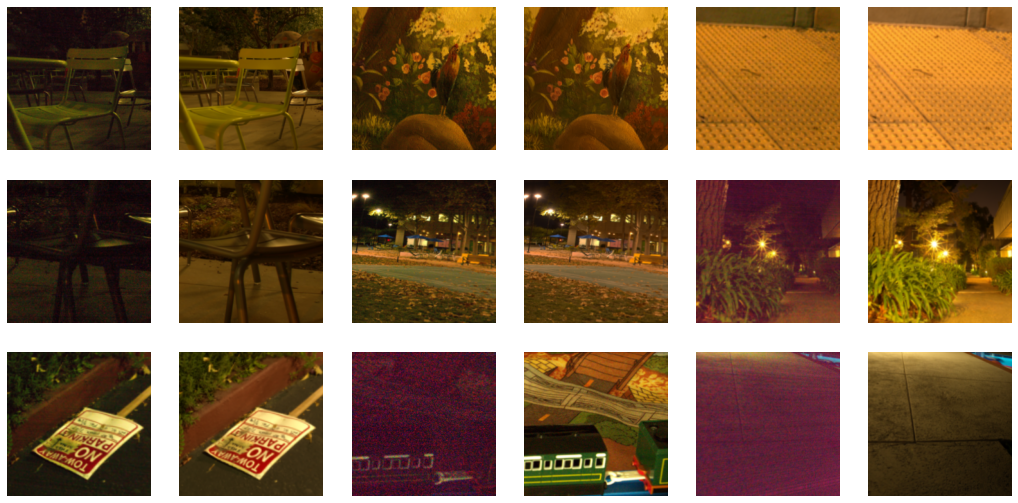

In [ ]:
dls.show_batch()

In [ ]:
learn_gen.fit_one_cycle(3)

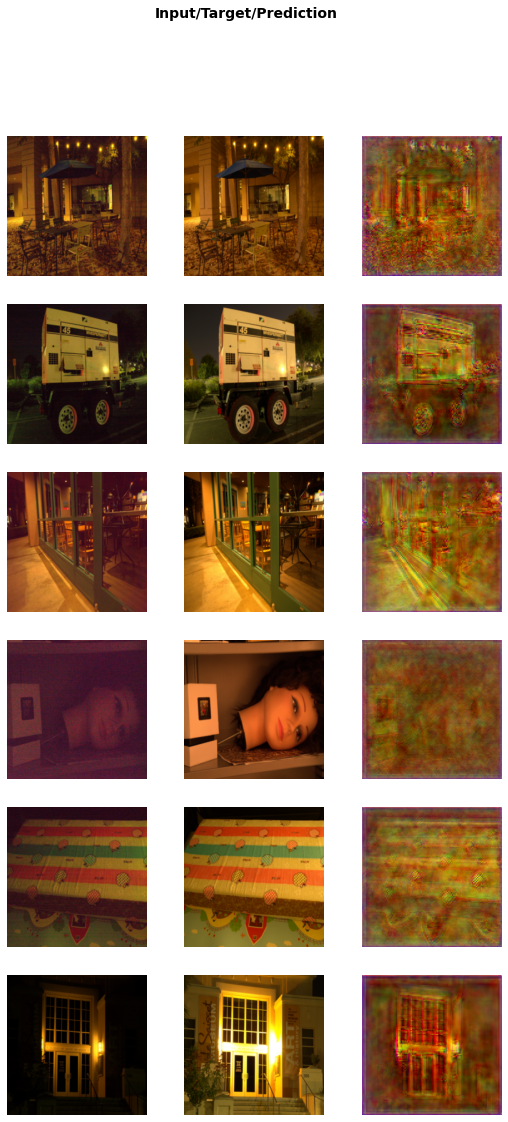

In [ ]:
# wd , y_range , loss_gen = 1e-3 , (-3 , 3) , MSELossFlat()
# bbone = resnet
learn_gen.show_results(1,max_n = 6)

In [ ]:
# unet_ler = unet_learner(blur= True , norm_type= NormType.Weight , self_attention= True , y_range = y_range , 
#                       dls = dls , arch = bbone , loss_func = loss_gen, n_out = 3)

In [ ]:
image = plt.imread('/content/download.jpg')

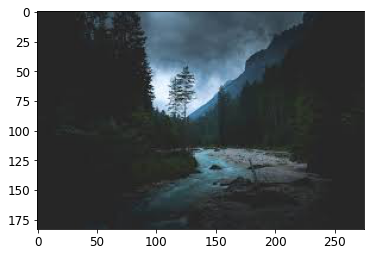

In [ ]:
plt.imshow(image)

In [ ]:
prediction  = learn_gen.predict(image)

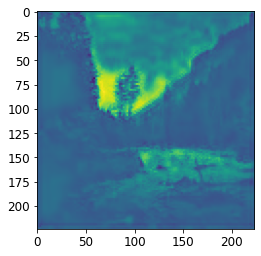

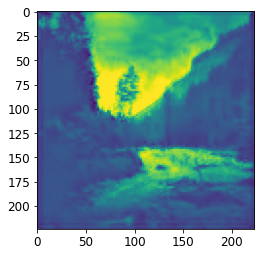

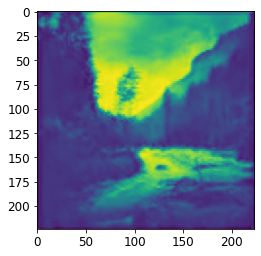

In [ ]:
plt.figure()
plt.imshow(prediction[1][0].numpy())
plt.figure()
plt.imshow(prediction[0][1].numpy())
plt.figure()
plt.imshow(prediction[1][2].numpy())

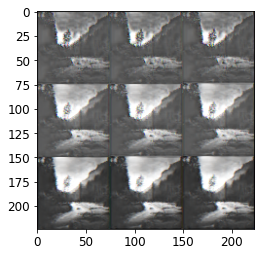

In [ ]:
plt.imshow(prediction[0].numpy().reshape(224,224,3))

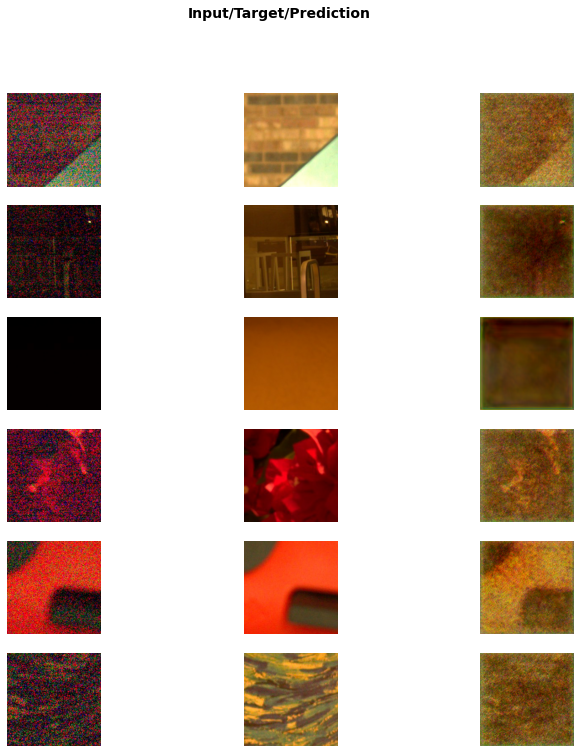

In [ ]:
learn_gen.show_results(max_n = 6 , figsize = (12,12))

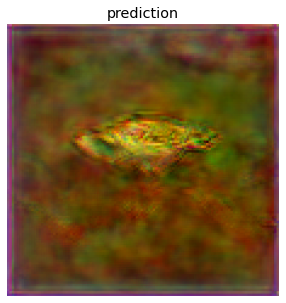

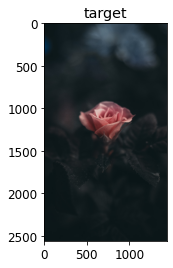

In [ ]:
plot_image('/content/saffu-Vya8eGk5Y64-unsplash.jpg')

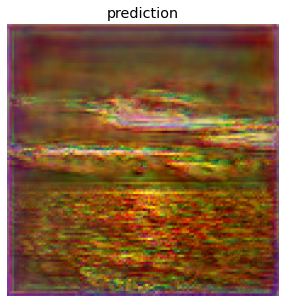

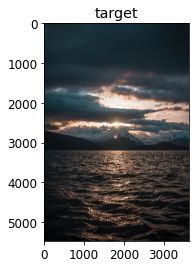

In [ ]:
plot_image('/content/steve-halama-kfwQvL6niR8-unsplash.jpg')#,plot_image('/content/steve-halama-kfwQvL6niR8-unsplash.jpg',ashik_model)

(None, None)

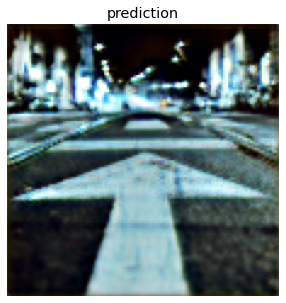

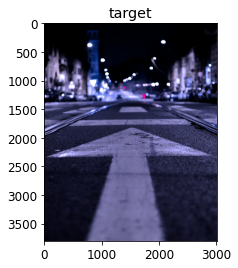

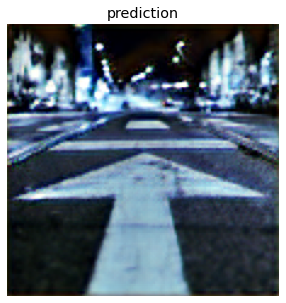

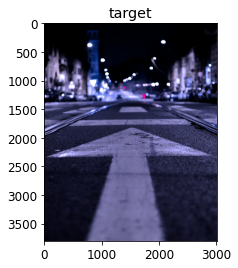

In [ ]:
plot_image('/content/vek-labs-e8ofKlNHdsg-unsplash.jpg'),plot_image('/content/vek-labs-e8ofKlNHdsg-unsplash.jpg',ashik_model)

In [ ]:
learn_gen.fine_tune(10,freeze_epochs= 5)

In [ ]:
learn_gen.export('/content/drive/MyDrive/png_format (1)/models/four_hr_model.pkl')

In [ ]:
!nvidia-smi

Mon Jul 12 13:34:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    30W /  70W |  13460MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

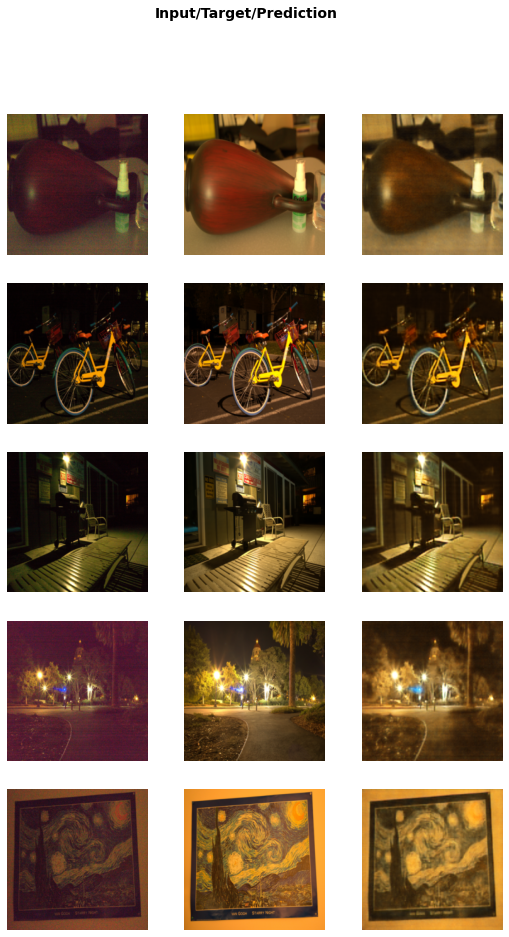

In [ ]:
learn_gen.show_results(max_n = 5)

In [ ]:
|ashik_model = load_learner('/content/drive/MyDrive/png_format (1)/models/first_model.pkl')

In [ ]:
plot_image('/content/saffu-Vya8eGk5Y64-unsplash.jpg')

NameError: ignored

SuggestedLRs(valley=tensor(4.7863e-06))

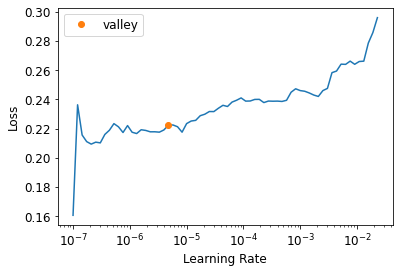

In [ ]:
learn_gen.lr_find()

In [ ]:
duck_model = load_learner('/content/drive/MyDrive/png_format/models/four_hr_model.pkl')

In [ ]:
def plot_image(path,model = duck_model):
  model.predict(plt.imread(path))[0].show(title='prediction')
  plt.figure()
  plt.imshow(plt.imread(path))
  plt.axis = False
  plt.title('target')


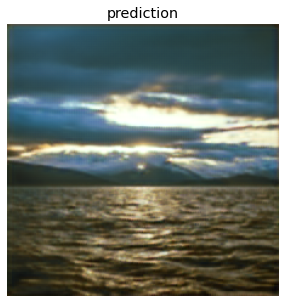

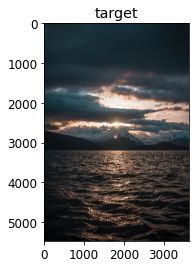

In [ ]:
plot_image('/content/steve-halama-kfwQvL6niR8-unsplash.jpg')

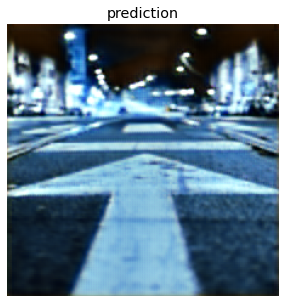

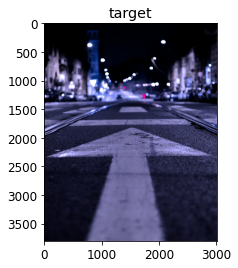

In [ ]:
plot_image('/content/vek-labs-e8ofKlNHdsg-unsplash.jpg')

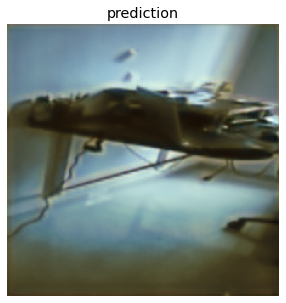

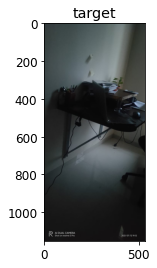

In [ ]:
plot_image('/content/WhatsApp Image 2021-07-12 at 19.13.16.jpeg')

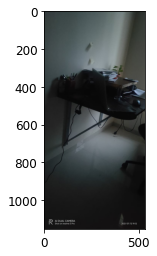

In [ ]:
plt.imshow(im)

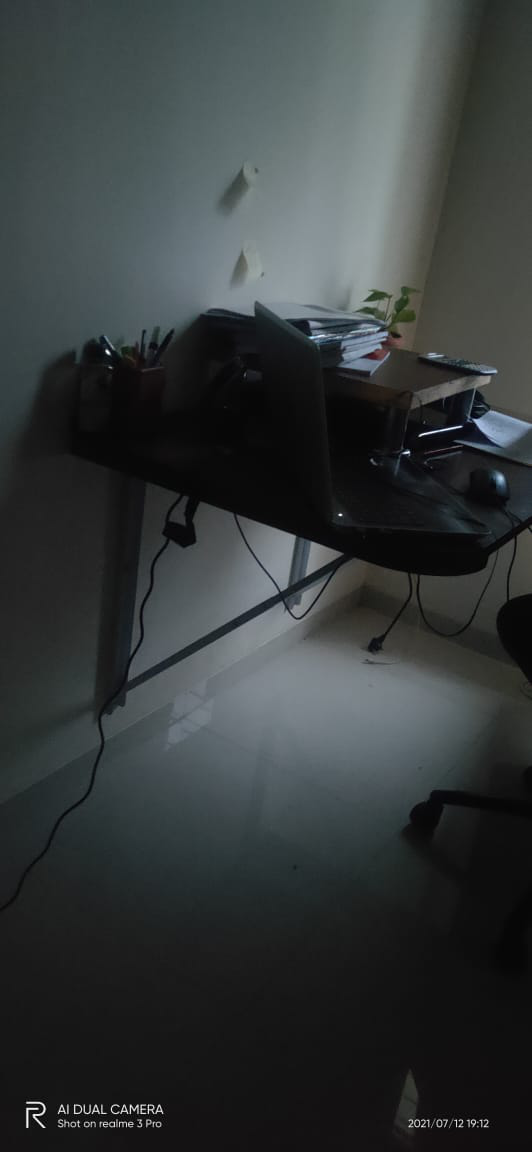

In [ ]:
from PIL import Image
im = Image.open('/content/WhatsApp Image 2021-07-12 at 19.13.16.jpeg')
im

Text(0.5, 1.0, 'original')

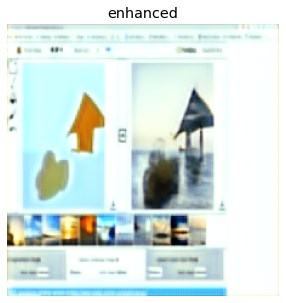

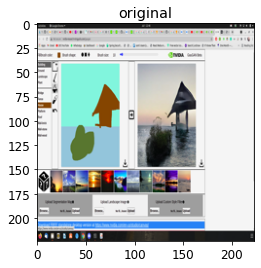

In [ ]:
crop = RandomResizedCrop(256)
im = Image.open('/content/Screenshot from 2021-07-01 22-48-51.png').convert('RGB')
duck_model.predict(np.array(im.reshape(224,224,3)))[0].show(title = 'enhanced')
plt.figure()
plt.axis = False
plt.imshow(im.reshape(224,224,3))
plt.title('original')

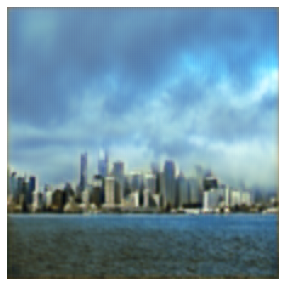

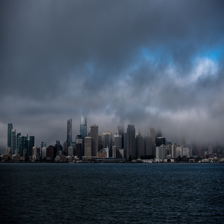

array([[[52, 62, 74],
        [49, 59, 71],
        [48, 58, 70],
        ...,
        [43, 60, 80],
        [43, 60, 80],
        [39, 56, 76]],

       [[51, 61, 73],
        [49, 59, 71],
        [49, 59, 71],
        ...,
        [43, 60, 80],
        [43, 60, 80],
        [41, 58, 78]],

       [[51, 61, 73],
        [50, 60, 72],
        [50, 60, 72],
        ...,
        [42, 59, 79],
        [43, 60, 80],
        [41, 58, 78]],

       ...,

       [[ 4,  5,  9],
        [ 4,  5,  9],
        [ 3,  4,  8],
        ...,
        [11, 25, 36],
        [11, 25, 36],
        [10, 23, 32]],

       [[ 5,  6, 10],
        [ 4,  5,  9],
        [ 4,  5,  9],
        ...,
        [ 9, 23, 34],
        [ 9, 23, 34],
        [11, 23, 35]],

       [[ 5,  6, 10],
        [ 5,  6, 10],
        [ 4,  5,  9],
        ...,
        [ 8, 22, 33],
        [ 8, 22, 33],
        [11, 23, 35]]], dtype=uint8)

# trying with tensorflow 

In [ ]:
features = mod_df.short_exp
labels = mod_df.long_exp

In [ ]:
import tensorflow_hub as hub 
main_thing = hub.KerasLayer('https://tfhub.dev/nvidia/unet/industrial/class_10/1')

In [ ]:
inputs = tf.keras.layers.Input(shape = [512,512,3])
x = tf.keras.layers.Conv2D(64,3,activation  = 'relu')(inputs)
x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Reshape(target_shape = (512,512,1))(x)
x = main_thing(x)
model = tf.keras.Model(inputs, x)

ValueError: ignored

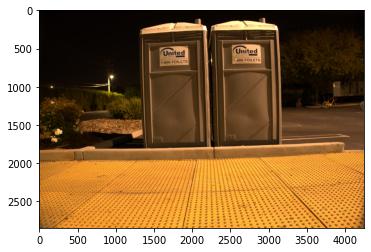